In [55]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [56]:
print (sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [57]:
data = sm.datasets.macrodata.load_pandas().data

Populating the interactive namespace from numpy and matplotlib


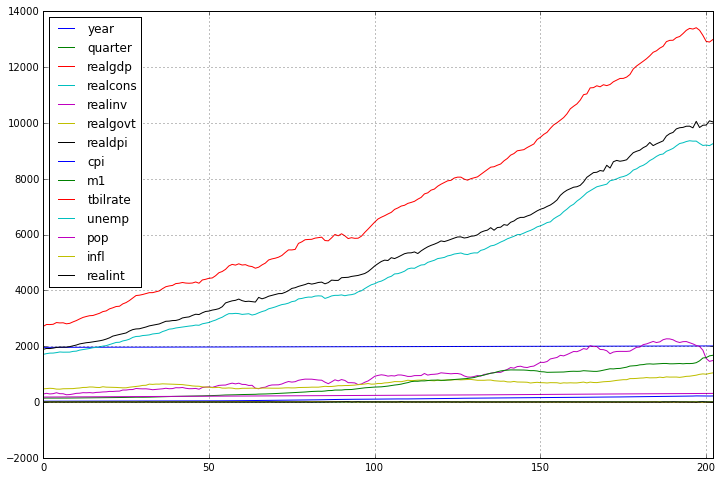

In [58]:
%pylab inline
data.plot(figsize=(12,8));



In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(25,25), diagonal="density");

   year  unemp
0  1959    5.8
1  1959    5.1
2  1959    5.3
3  1959    5.6
4  1960    5.2


,year,unemp
count,203.000000,203.000000
mean,1983.876847,5.884729
std,14.686817,1.458574
min,1959.000000,3.400000
25%,1971.000000,4.900000
50%,1984.000000,5.700000
75%,1996.500000,6.800000
max,2009.000000,10.700000


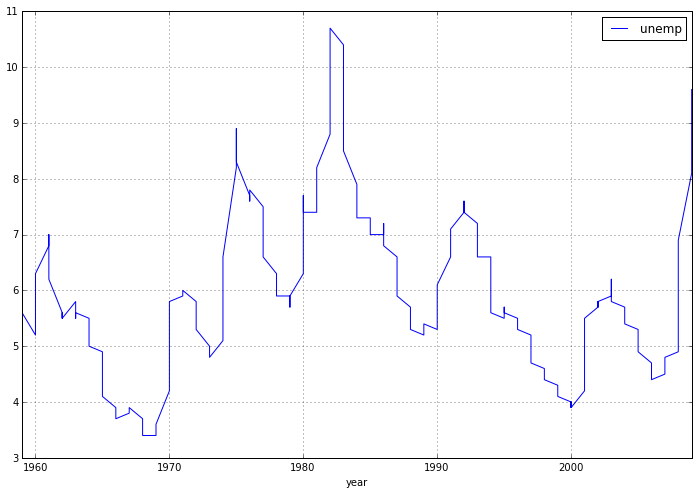

In [60]:
data = sm.datasets.macrodata.load_pandas().data
datadiff=data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,8));
print (datadiff.head())
datadiff.describe()

In [61]:
#print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))
datadiff.head()
datadiff.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff['year']


In [62]:
datadiff.head()

,unemp
1959-03-31,5.8
1959-06-30,5.1
1959-09-30,5.3
1959-12-31,5.6
1960-03-31,5.2


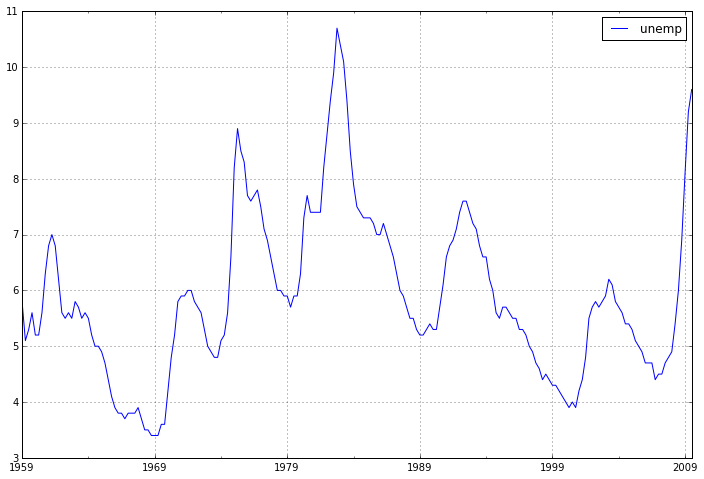

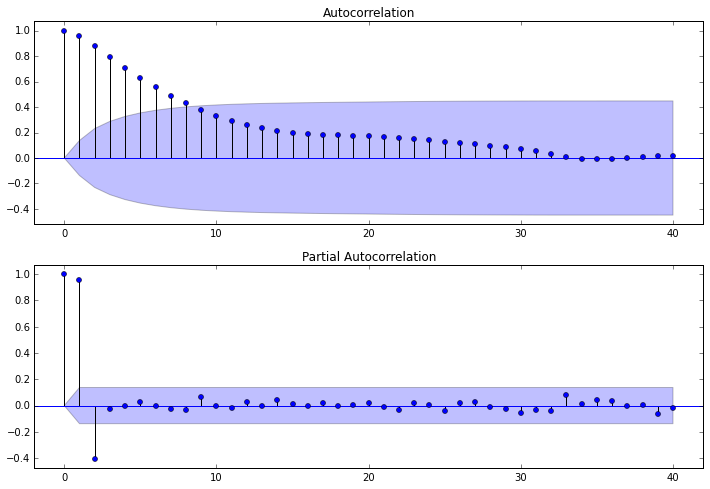

In [65]:
datadiff.plot(figsize=(12,8));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff, lags=40, ax=ax2)

In [66]:
arma_mod20 = sm.tsa.ARMA(datadiff, (2,1)).fit()
print (sm.stats.durbin_watson(arma_mod20.resid.values))

arma_mod20.summary()

2.0158095253


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 1)   Log Likelihood                  -9.872
Method:                       css-mle   S.D. of innovations              0.251
Date:                Mon, 09 Nov 2015   AIC                             29.745
Time:                        11:59:16   BIC                             46.311
Sample:                    03-31-1959   HQIC                            36.447
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.0872      0.435     13.990      0.000         5.234     6.940
ar.L1.unemp     1.5822      0.086     18.303      0.000         1.413     1.752
ar.L2.unemp    -0.6265      0.086     -7.295      0.000        -0.795    -0.458
ma.L1.unemp     0.1188      0.115      1.032      0.303        -0.107     0.344
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2627           -0.0412j            1.2634           -0.0052
AR.2            1.2627           +0.0412j            1.2634            0.0052
MA.1           -8.4166           +0.0000j            8.4166            0.5000
-----------------------------------------------------------------------------
"""

In [67]:
datadiff.head()

,unemp
1959-03-31,5.8
1959-06-30,5.1
1959-09-30,5.3
1959-12-31,5.6
1960-03-31,5.2


In [68]:
arma_mod30 = sm.tsa.ARMA(datadiff, (8,1)).fit()
print (sm.stats.durbin_watson(arma_mod30.resid.values))
arma_mod30.summary()


2.01535970094


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(8, 1)   Log Likelihood                  -7.178
Method:                       css-mle   S.D. of innovations              0.248
Date:                Mon, 09 Nov 2015   AIC                             36.356
Time:                        11:59:19   BIC                             72.801
Sample:                    03-31-1959   HQIC                            51.100
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.0977      0.452     13.482      0.000         5.211     6.984
ar.L1.unemp     2.1156      0.399      5.306      0.000         1.334     2.897
ar.L2.unemp    -1.5322      0.686     -2.233      0.027        -2.877    -0.187
ar.L3.unemp     0.5148      0.384      1.341      0.182        -0.238     1.268
ar.L4.unemp    -0.2770      0.218     -1.269      0.206        -0.705     0.151
ar.L5.unemp     0.1966      0.224      0.879      0.380        -0.242     0.635
ar.L6.unemp     0.1165      0.212      0.549      0.584        -0.299     0.532
ar.L7.unemp    -0.2878      0.174     -1.659      0.099        -0.628     0.052
ar.L8.unemp     0.1318      0.078      1.692      0.092        -0.021     0.284
ma.L1.unemp    -0.4177      0.399     -1.047      0.297        -1.200     0.365
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5766           -0.0000j            1.5766           -0.5000
AR.2           -0.5996           -1.1907j            1.3332           -0.3242
AR.3           -0.5996           +1.1907j            1.3332            0.3242
AR.4            0.7792           -1.0575j            1.3136           -0.1489
AR.5            0.7792           +1.0575j            1.3136            0.1489
AR.6            1.1436           -0.3177j            1.1869           -0.0431
AR.7            1.1436           +0.3177j            1.1869            0.0431
AR.8            1.1139           -0.0000j            1.1139           -0.0000
MA.1            2.3943           +0.0000j            2.3943            0.0000
-----------------------------------------------------------------------------
"""

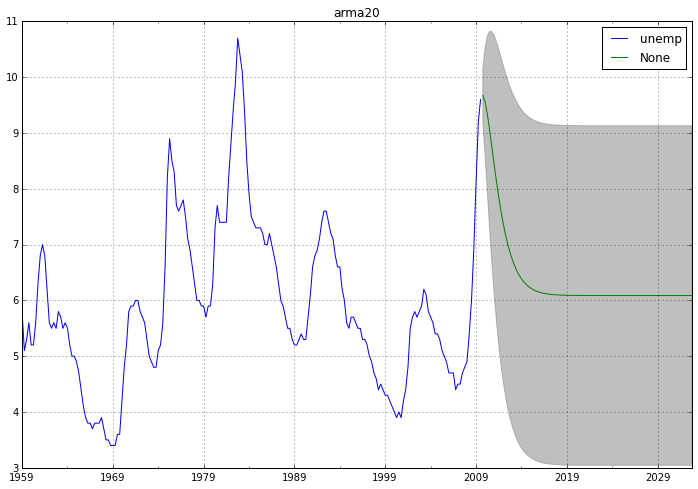

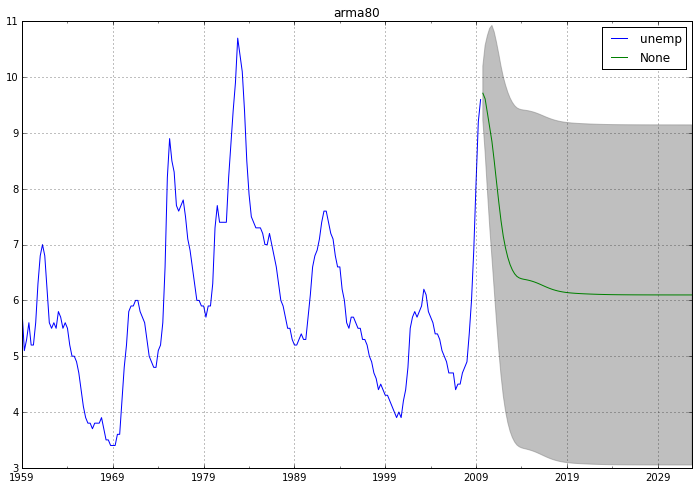

In [69]:
ax = datadiff.plot(figsize=(12,8));

arma_mod20.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma20")

ax = datadiff.plot(figsize=(12,8));
arma_mod30.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma80")


#Removing trends by modelling them

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realgovt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     578.4
Date:                Mon, 09 Nov 2015   Prob (F-statistic):           4.63e-61
Time:                        12:00:35   Log-Likelihood:                -1154.4
No. Observations:                 203   AIC:                             2313.
Df Residuals:                     201   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.573e+04    681.598    -23.075      0.000     -1.71e+04 -1.44e+04
year           8.2623      0.344     24.049      0.000         7.585     8.940
==============================================================================
Omnibus:                       67.911   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.042
Skew:                           0.044   Prob(JB):                      0.00400
Kurtosis:                       1.861   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

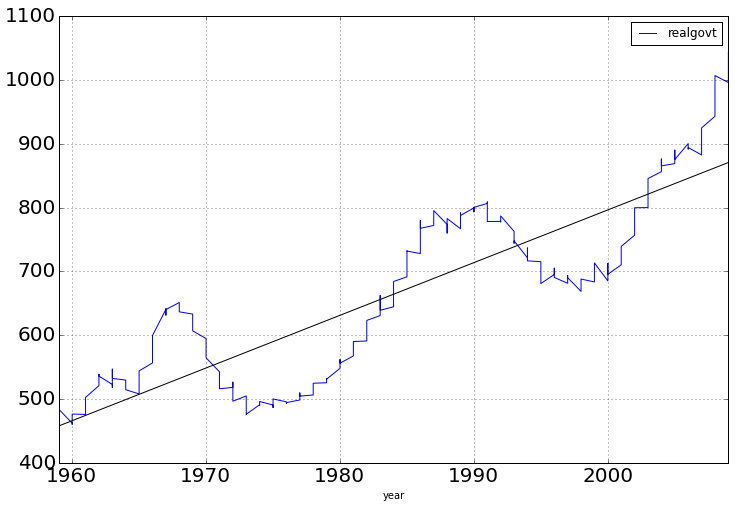

In [70]:
data = sm.datasets.macrodata.load_pandas().data

datadiff2=data[['year', 'realgovt']]
ax = data.plot('year', 'realgovt', figsize=(12,8), fontsize=20);

datadiff2.describe()
lf = sm.OLS(datadiff2['realgovt'], sm.add_constant(datadiff2['year'])).fit()
ax.plot(datadiff2['year'],lf.predict(), 'k-')
lf.summary()

/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,year,realgovt,realgovt_stat
count,203.000000,203.000000,2.030000e+02
mean,1983.876847,663.328640,1.944549e-11
std,14.686817,140.863655,7.153648e+01
min,1959.000000,460.400000,-1.113271e+02
25%,1971.000000,527.959500,-7.234556e+01
50%,1984.000000,662.412000,1.038327e+01
75%,1996.500000,773.049000,5.612485e+01
max,2009.000000,1044.088000,1.731841e+02


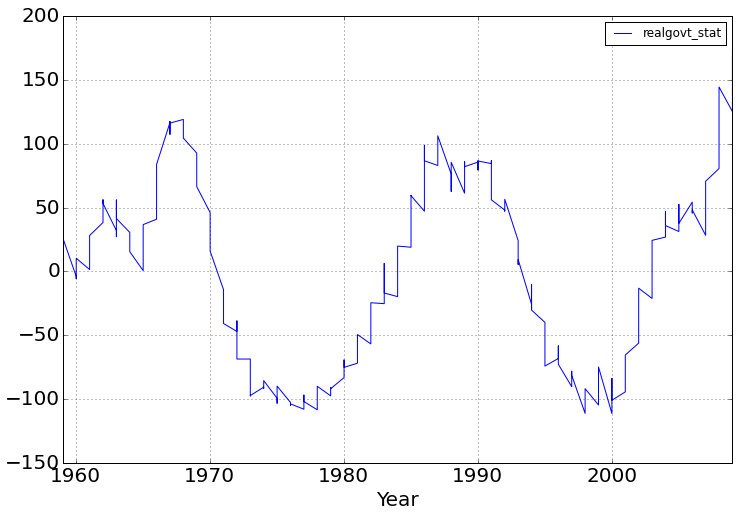

In [71]:
datadiff2['realgovt_stat'] = (datadiff2.realgovt-lf.predict())
ax = datadiff2.plot('year', 'realgovt_stat', figsize=(12,8), fontsize=20)
ax.set_xlabel("Year", fontsize=20)
datadiff2.describe()

In [72]:
#print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))
datadiff2.head()
datadiff2.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff2['year']
del datadiff2['realgovt']
datadiff2.head()


,realgovt_stat
1959-03-31,12.256577
1959-06-30,23.512577
1959-09-30,33.471577
1959-12-31,26.263577
1960-03-31,-3.851732


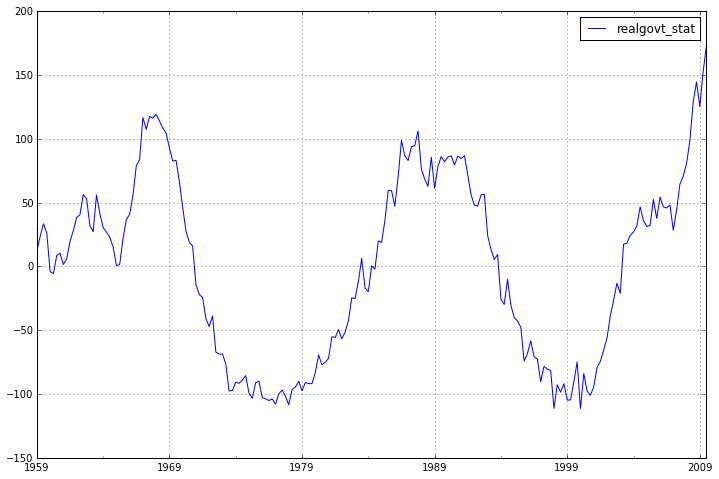

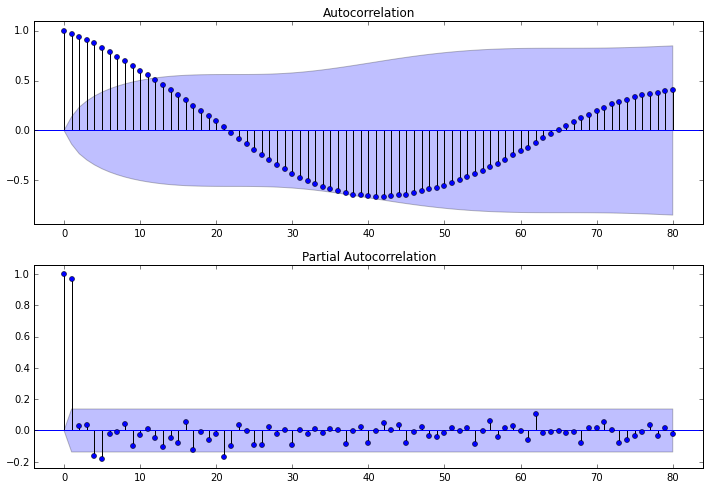

In [73]:
datadiff2.plot(figsize=(12,8));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff2.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff2, lags=80, ax=ax2)

In [74]:
arma_mod100 = sm.tsa.ARMA(datadiff2, (10,0)).fit()
print (sm.stats.durbin_watson(arma_mod100.resid.values))

arma_mod100.summary()

1.96492521655


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          realgovt_stat   No. Observations:                  203
Model:                    ARMA(10, 0)   Log Likelihood                -798.695
Method:                       css-mle   S.D. of innovations             12.227
Date:                Mon, 09 Nov 2015   AIC                           1621.390
Time:                        12:03:15   BIC                           1661.148
Sample:                    03-31-1959   HQIC                          1637.474
                         - 09-30-2009                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   13.8823     26.482      0.524      0.601       -38.022    65.787
ar.L1.realgovt_stat      0.8632      0.070     12.295      0.000         0.726     1.001
ar.L2.realgovt_stat      0.1080      0.093      1.163      0.246        -0.074     0.290
ar.L3.realgovt_stat      0.2125      0.094      2.271      0.024         0.029     0.396
ar.L4.realgovt_stat      0.1669      0.095      1.756      0.081        -0.019     0.353
ar.L5.realgovt_stat     -0.2629      0.096     -2.730      0.007        -0.452    -0.074
ar.L6.realgovt_stat     -0.0875      0.096     -0.907      0.365        -0.276     0.101
ar.L7.realgovt_stat     -0.1249      0.096     -1.303      0.194        -0.313     0.063
ar.L8.realgovt_stat      0.1754      0.095      1.844      0.067        -0.011     0.362
ar.L9.realgovt_stat     -0.0317      0.095     -0.333      0.739        -0.218     0.155
ar.L10.realgovt_stat    -0.0511      0.073     -0.702      0.484        -0.194     0.092
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0433           -0.0794j            1.0463           -0.0121
AR.2             1.0433           +0.0794j            1.0463            0.0121
AR.3             0.0497           -1.1522j            1.1532           -0.2431
AR.4             0.0497           +1.1522j            1.1532            0.2431
AR.5             1.2397           -0.9829j            1.5820           -0.1067
AR.6             1.2397           +0.9829j            1.5820            0.1067
AR.7            -0.7883           -1.0595j            1.3206           -0.3518
AR.8            -0.7883           +1.0595j            1.3206            0.3518
AR.9            -1.2551           -0.0000j            1.2551           -0.5000
AR.10           -2.4551           -0.0000j            2.4551           -0.5000
------------------------------------------------------------------------------
"""

PLAYING WITH PARAMETERS

In [75]:
data = sm.datasets.macrodata.load_pandas().data

datadiff3=data[['year', 'realgovt']]
datadiff3.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff3['year']

arima_mod110 = sm.tsa.ARIMA(datadiff3, (10,1,0)).fit()
print (sm.stats.durbin_watson(arima_mod110.resid.values))

arima_mod110.summary()

arima_mod311 = sm.tsa.ARIMA(datadiff3, (3,1,1)).fit()
print (sm.stats.durbin_watson(arima_mod111.resid.values))

arima_mod311.summary()

1.98720171649
1.98605253679


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.realgovt   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -790.142
Method:                       css-mle   S.D. of innovations             12.080
Date:                Mon, 09 Nov 2015   AIC                           1592.283
Time:                        12:03:41   BIC                           1612.133
Sample:                    06-30-1959   HQIC                          1600.314
                         - 09-30-2009                                         
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                3.1550      2.020      1.562      0.120        -0.805     7.115
ar.L1.D.realgovt     0.5225      0.122      4.277      0.000         0.283     0.762
ar.L2.D.realgovt     0.0958      0.078      1.230      0.220        -0.057     0.248
ar.L3.D.realgovt     0.2144      0.078      2.754      0.006         0.062     0.367
ma.L1.D.realgovt    -0.5911      0.109     -5.406      0.000        -0.805    -0.377
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1157           -0.0000j            1.1157           -0.0000
AR.2           -0.7812           -1.8894j            2.0445           -0.3124
AR.3           -0.7812           +1.8894j            2.0445            0.3124
MA.1            1.6918           +0.0000j            1.6918            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
arma_mod31 = sm.tsa.ARMA(datadiff2, (3,1)).fit()
print (sm.stats.durbin_watson(arma_mod30.resid.values))
arma_mod30.summary()

2.01535970094


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(8, 1)   Log Likelihood                  -7.178
Method:                       css-mle   S.D. of innovations              0.248
Date:                Mon, 09 Nov 2015   AIC                             36.356
Time:                        12:03:41   BIC                             72.801
Sample:                    03-31-1959   HQIC                            51.100
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.0977      0.452     13.482      0.000         5.211     6.984
ar.L1.unemp     2.1156      0.399      5.306      0.000         1.334     2.897
ar.L2.unemp    -1.5322      0.686     -2.233      0.027        -2.877    -0.187
ar.L3.unemp     0.5148      0.384      1.341      0.182        -0.238     1.268
ar.L4.unemp    -0.2770      0.218     -1.269      0.206        -0.705     0.151
ar.L5.unemp     0.1966      0.224      0.879      0.380        -0.242     0.635
ar.L6.unemp     0.1165      0.212      0.549      0.584        -0.299     0.532
ar.L7.unemp    -0.2878      0.174     -1.659      0.099        -0.628     0.052
ar.L8.unemp     0.1318      0.078      1.692      0.092        -0.021     0.284
ma.L1.unemp    -0.4177      0.399     -1.047      0.297        -1.200     0.365
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5766           -0.0000j            1.5766           -0.5000
AR.2           -0.5996           -1.1907j            1.3332           -0.3242
AR.3           -0.5996           +1.1907j            1.3332            0.3242
AR.4            0.7792           -1.0575j            1.3136           -0.1489
AR.5            0.7792           +1.0575j            1.3136            0.1489
AR.6            1.1436           -0.3177j            1.1869           -0.0431
AR.7            1.1436           +0.3177j            1.1869            0.0431
AR.8            1.1139           -0.0000j            1.1139           -0.0000
MA.1            2.3943           +0.0000j            2.3943            0.0000
-----------------------------------------------------------------------------
"""

In [77]:
## arma_mod20 = sm.tsa.ARMA(datadiff, (3,0)).fit()
print (sm.stats.durbin_watson(arma_mod20.resid.values))

arma_mod20.summary()

2.0158095253


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 1)   Log Likelihood                  -9.872
Method:                       css-mle   S.D. of innovations              0.251
Date:                Mon, 09 Nov 2015   AIC                             29.745
Time:                        12:03:41   BIC                             46.311
Sample:                    03-31-1959   HQIC                            36.447
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.0872      0.435     13.990      0.000         5.234     6.940
ar.L1.unemp     1.5822      0.086     18.303      0.000         1.413     1.752
ar.L2.unemp    -0.6265      0.086     -7.295      0.000        -0.795    -0.458
ma.L1.unemp     0.1188      0.115      1.032      0.303        -0.107     0.344
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2627           -0.0412j            1.2634           -0.0052
AR.2            1.2627           +0.0412j            1.2634            0.0052
MA.1           -8.4166           +0.0000j            8.4166            0.5000
-----------------------------------------------------------------------------
"""

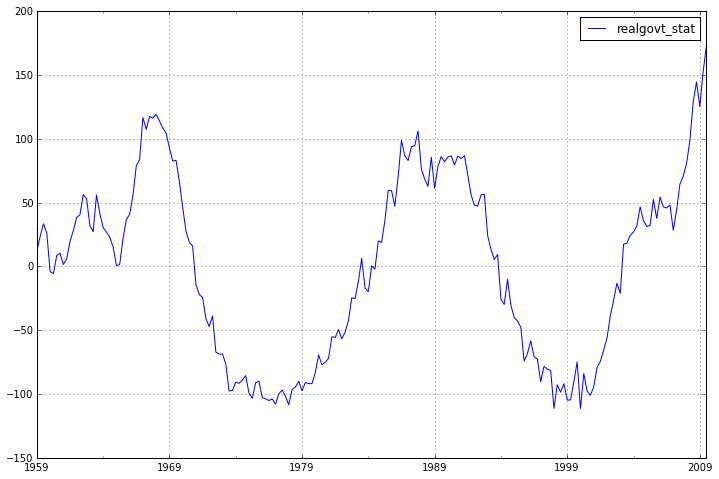

In [78]:
datadiff2.plot(figsize=(12,8));

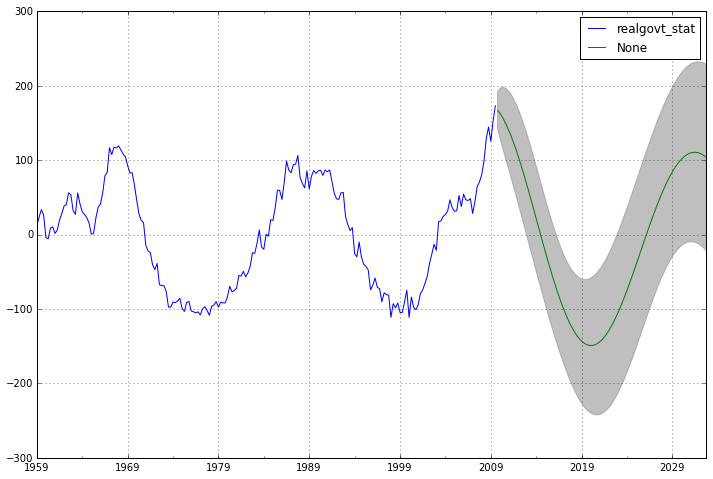

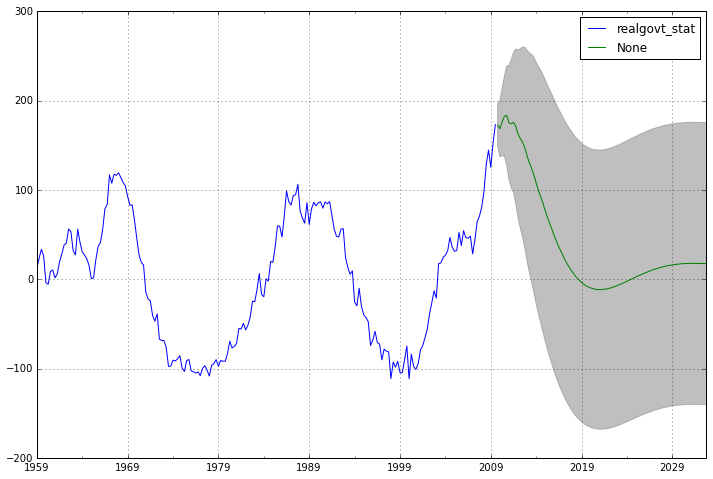

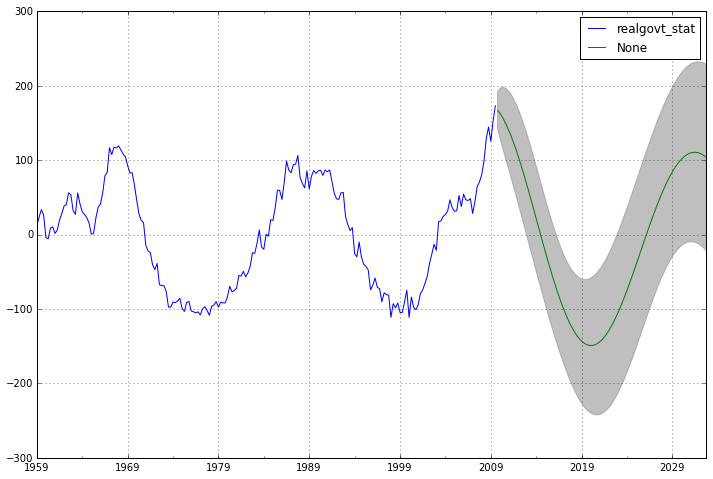

In [79]:
arma_mod20.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax = datadiff2.plot(figsize=(12,8));
arma_mod100.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax = datadiff2.plot(figsize=(12,8));
arma_mod31.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)


#OR NOT REMOVING TRENDS AND USING ARIMA

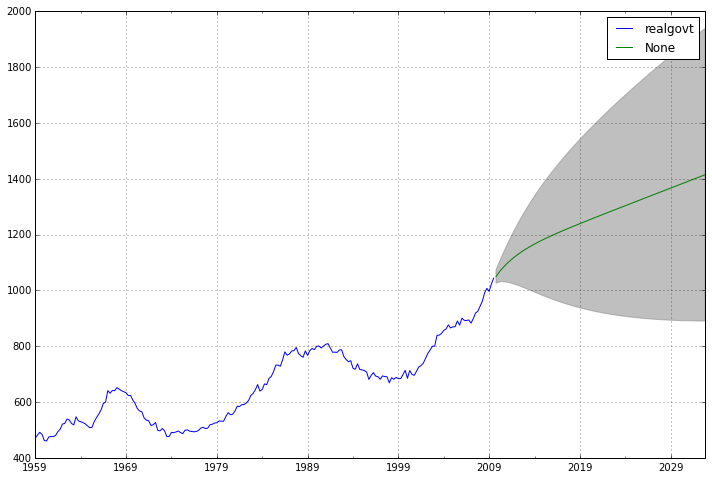

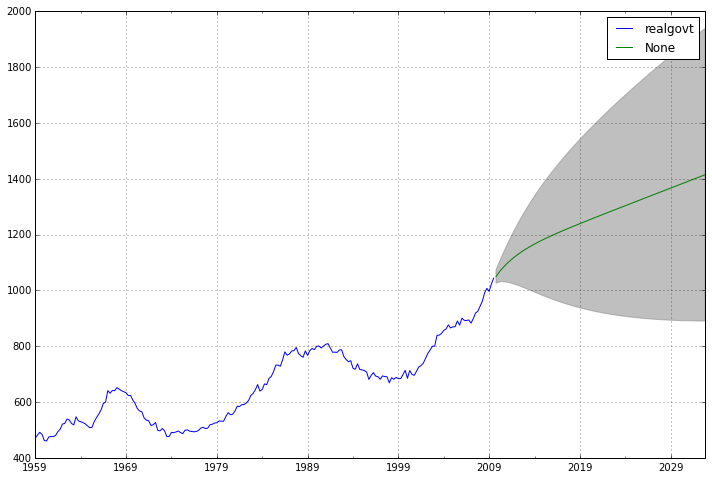

In [80]:
arima_mod110.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax = datadiff3.plot(figsize=(12,8));
arima_mod311.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)